# Projetinho 2 TA - Análise, Limpeza e Predição de Dados
**Escrito por:** Letícia Agudo Falconer

Esse projeto tem como objetivo colocar em prática os conceitos vistos no Turing Academy até o momento, utilizando o dataset apresentado a seguir para predizer se um determinado cientista de dados deseja mudar de emprego ou não.


##Importação das Bibliotecas:

In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##Sobre os Datasets:


Serão utilizados dois datasets, um de teste e um de treino, a respeito de candidados para um determinado processo seletivo

**Colunas:**
* enrollee_id: ID exclusivo para o candidato
* city: Código da cidade
* city_ development _index: Índice de desenvolvimento da cidade (em escala)
* gender: Gênero do candidato
* relevent_experience: Experiência relevante do candidato
* enrolled_university: Tipo de curso universitário matriculado, se houver
* education_level: Nível de educação do candidato
* major_discipline: Major principal de educação do candidato
  * STEM: Science, Technology, Engineering, and Math Degree
  * Business Major: Administração de negócios
  * Humanities: Humanidades
  * Arts: Artes
  * No major: Não faz/possui um major
  * Other: Outro
* experience: Experiência total do candidato em anos
* company_size: Nº de funcionários na empresa do empregador atual
* company_type: Tipo de empregador atual
* lastnewjob: Diferença em anos entre o emprego anterior e o emprego atual
* training_hours: Horas de treinamento concluidas
* target: 0 - Não está procurando uma mudança de emprego ou 1 - procurando uma mudança de emprego (essa coluna está presente apenas no dataset de treino)

Vamos importá-los e definir a coluna "ID" como index dos datasets, e depois utilizar o .head() e o .info() para entendê-los melhor.

In [381]:
treino = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")

treino.set_index("enrollee_id", inplace=True)
teste.set_index("enrollee_id", inplace=True)

In [382]:
treino.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [383]:
teste.head()


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
enrollee_id,,,,,,,,,,,,
32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [384]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


In [385]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 32403 to 12215
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    2129 non-null   object 
 1   city_development_index  2129 non-null   float64
 2   gender                  1621 non-null   object 
 3   relevent_experience     2129 non-null   object 
 4   enrolled_university     2098 non-null   object 
 5   education_level         2077 non-null   object 
 6   major_discipline        1817 non-null   object 
 7   experience              2124 non-null   object 
 8   company_size            1507 non-null   object 
 9   company_type            1495 non-null   object 
 10  last_new_job            2089 non-null   object 
 11  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 216.2+ KB


- Ambos os datasets possuem as mesmas colunas, com excessão da "target", presente apenas nos dados de treino
- Aproximadamente 90% dos nossos dados são de treino
- A maioria de nossos dados são categóricos (Dtype = object).
- Existem várias categorias com dados faltantes

A partir dessa etapa, iremos juntar os dois datasets, para tornar o trabalho mais fácil. Depois da análise e limpeza dos dados, poderemos dividí-los novamente tomando como base a coluna "target", que será NaN para os dados de teste

In [386]:
candidatos = pd.merge(treino, teste, how = 'outer')

In [387]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21274 entries, 0 to 21273
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    21274 non-null  object 
 1   city_development_index  21274 non-null  float64
 2   gender                  16258 non-null  object 
 3   relevent_experience     21274 non-null  object 
 4   enrolled_university     20857 non-null  object 
 5   education_level         20762 non-null  object 
 6   major_discipline        18149 non-null  object 
 7   experience              21204 non-null  object 
 8   company_size            14719 non-null  object 
 9   company_type            14505 non-null  object 
 10  last_new_job            20811 non-null  object 
 11  training_hours          21274 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


#Limpeza dos dados

##Dados Categóricos

Primeiro vamos utilizar o método .describe().

In [388]:
candidatos.describe(include=["object"]).T

,count,unique,top,freq
city,21274,123,city_103,4819
gender,16258,3,Male,14669
relevent_experience,21274,2,Has relevent experience,15304
enrolled_university,20857,3,no_enrollment,15324
education_level,20762,5,Graduate,12856
major_discipline,18149,6,STEM,16100
experience,21204,22,>20,3660
company_size,14719,8,50-99,3420
company_type,14505,6,Pvt Ltd,10950
last_new_job,20811,6,1,8920


A princípio, nada chama muita atenção fora os dados faltantes.



Observando os diferentes dados de cada categoria, percebe-se que "company_size" está um pouco esquisito, e pode ser escrito de uma maneira que se encaixe melhor com o resto do dataset.

In [389]:
print(candidatos["company_size"].unique())

[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']


In [390]:
# Substituindo "10/49" por "10-49".
candidatos["company_size"].replace("10/49", "10-49", inplace=True)

# Substituindo "10000+" por ">10000".
candidatos["company_size"].replace("10000+", ">10000", inplace=True)

# Olhando novamente os dados.
print(candidatos["company_size"].unique())

[nan '50-99' '<10' '>10000' '5000-9999' '1000-4999' '10-49' '100-500'
 '500-999']


### Dados Faltantes

In [391]:
candidatos.isnull().sum()

city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6555
company_type              6769
last_new_job               463
training_hours               0
target                    2116
dtype: int64

- gender e company_type: vamos substituir os NaN pela categoria "Other", já que ela já existe

In [392]:
print(candidatos["gender"].unique())

['Male' nan 'Female' 'Other']


In [393]:
print(candidatos["company_type"].unique())

[nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']


In [394]:
candidatos["gender"].replace(np.nan, "Other", inplace = True)
candidatos["company_type"].replace(np.nan, "Other", inplace = True)

- experience: vamos deletar os NaN, já que são poucos dados

In [395]:
print(candidatos["experience"].unique())

['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]


In [396]:
deletar = candidatos[candidatos["experience"].isnull()].index
candidatos.drop(deletar, inplace=True)

- Para as demais categorias, vamos substituir os dados faltantes pela moda

In [397]:
candidatos["enrolled_university"].fillna(candidatos["enrolled_university"].mode()[0], inplace=True)
candidatos["education_level"].fillna(candidatos["education_level"].mode()[0], inplace=True)
candidatos["major_discipline"].fillna(candidatos["major_discipline"].mode()[0], inplace=True)
candidatos["company_size"].fillna(candidatos["company_size"].mode()[0], inplace=True)
candidatos["last_new_job"].fillna(candidatos["last_new_job"].mode()[0], inplace=True)

Checando os dados novamente:

In [398]:
candidatos.isnull().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type                 0
last_new_job                 0
training_hours               0
target                    2111
dtype: int64

##Dados Numéricos

O método describe() nos dá uma visão geral, e olhando para os valores de mínimo e máximo de cada dado, já podemos tirar algumas conclusões.

In [399]:
candidatos.describe()

,city_development_index,training_hours,target
count,21204.000000,21204.000000,19093.000000
mean,0.828590,65.328193,0.248992
std,0.123467,60.082869,0.432440
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


Nada parece estar fora do lugar, e não existem dados faltantes

#Análise de Dados


Vamos fazer uma análise para entender melhor os nossos dados e como eles se relacionam com a coluna de target, checando categorias que não parecem ser correlatas para assim não utilizá-las na nossa predição

A partir desta etapa, vamos dividir nosso dataset em treino e teste novamente, e analisar com base nos dados de treino.

In [400]:
teste = candidatos[candidatos["target"].isnull()]
treino = candidatos[candidatos["target"].isnull() == False]
treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19093 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19093 non-null  object 
 1   city_development_index  19093 non-null  float64
 2   gender                  19093 non-null  object 
 3   relevent_experience     19093 non-null  object 
 4   enrolled_university     19093 non-null  object 
 5   education_level         19093 non-null  object 
 6   major_discipline        19093 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            19093 non-null  object 
 9   company_type            19093 non-null  object 
 10  last_new_job            19093 non-null  object 
 11  training_hours          19093 non-null  int64  
 12  target                  19093 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


**Variáveis Numéricas:**

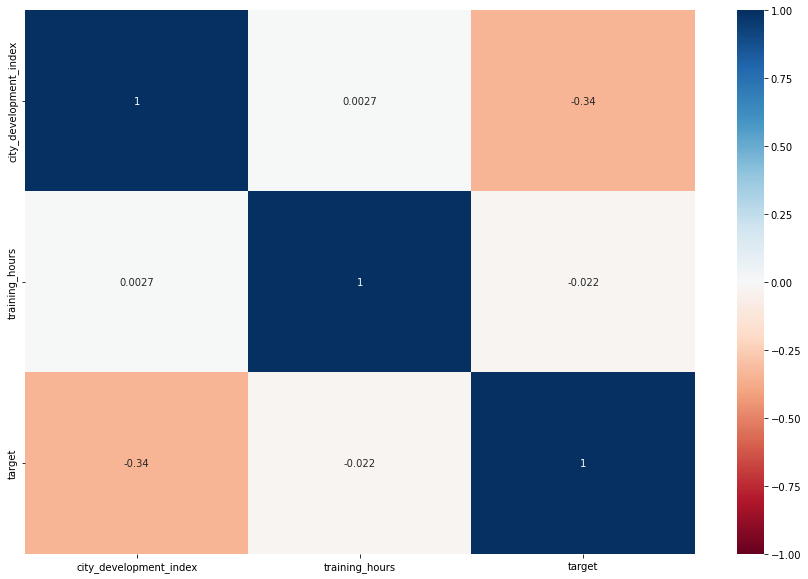

In [401]:
plt.figure(figsize=(15,10))
sns.heatmap(treino.corr(), annot=True, vmin=-1, vmax=1, cmap="RdBu")
plt.show()

A categoria "training_hours" possui uma correlação com o target muito próxima de 0, podendo ser desconsiderada no nosso modelo de predição.

**Gênero:**


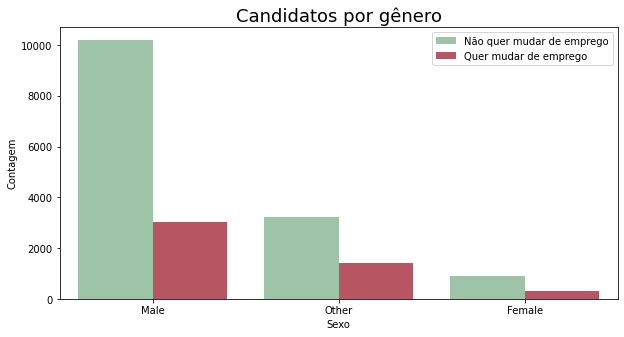

In [402]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'gender', hue="target", data = treino, 
              palette={0: "#98caa3", 1: "#c84557"}) 
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.title("Candidatos por gênero", fontsize=18)
plt.legend(labels=['Não quer mudar de emprego', 'Quer mudar de emprego'])
plt.show()

É possível percebermos claramente a maior quantidade pessoas do gênero masculino e a minoria extrema do gênero feminino participando do processo seletivo. Também percebemos a grande quantidade na categoria "Other", já que foi assim que classificamos os dados faltantes. E por fim, o gênero masculino parece querer uma mudança de emprego em uma maior proporção que os outros dois.

**Nível de educação:**

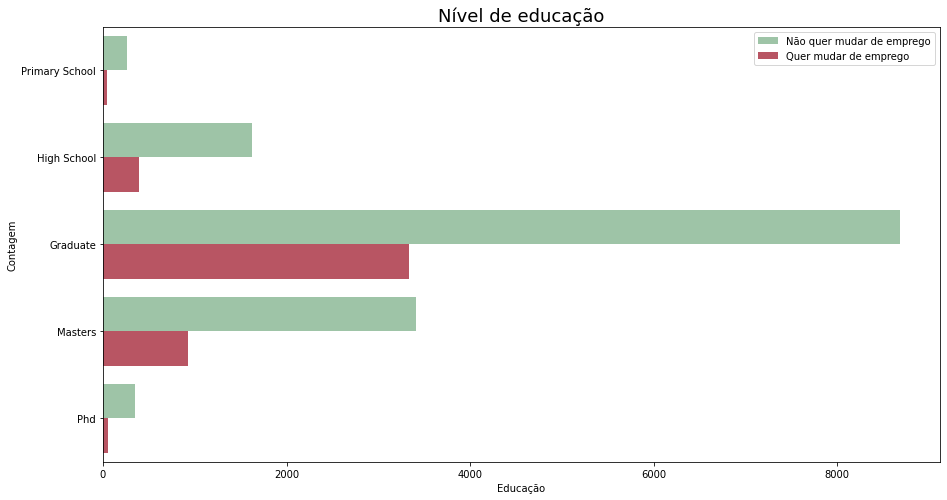

In [403]:
ordem = ["Primary School", "High School", "Graduate", "Masters", "Phd"]
plt.figure(figsize=(15,8))
sns.countplot(y = 'education_level', hue="target", order=ordem, data = candidatos, 
              palette={0: "#98caa3", 1: "#c84557"}) 
plt.xlabel("Educação")
plt.ylabel("Contagem")
plt.title("Nível de educação", fontsize=18)
plt.legend(labels=['Não quer mudar de emprego', 'Quer mudar de emprego'])
plt.show()

Esta também não parece possuir correlação muito forte com a target, já que todas as categorias possuem distribuições similares, mas não podemos descartá-la.

**Experiência relevante:**

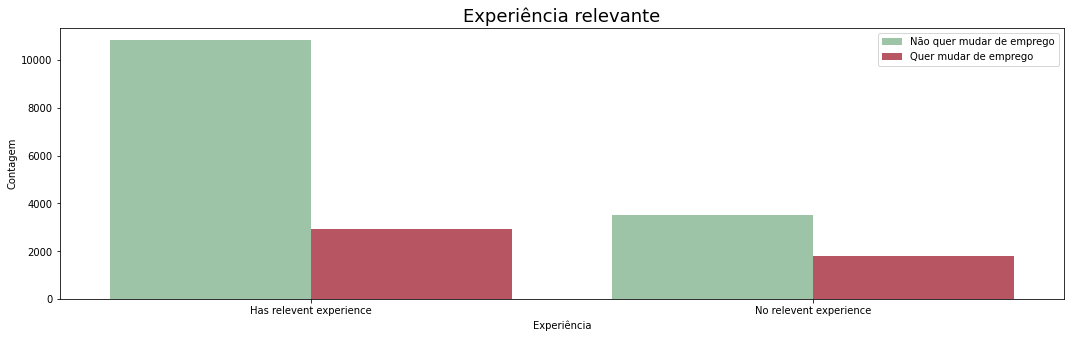

In [404]:
plt.figure(figsize=(18,5))
sns.countplot(x = 'relevent_experience', hue="target", data = candidatos, 
              palette={0: "#98caa3", 1: "#c84557"}) 
plt.xlabel("Experiência")
plt.ylabel("Contagem")
plt.title("Experiência relevante", fontsize=18)
plt.legend(labels=['Não quer mudar de emprego', 'Quer mudar de emprego'])
plt.show()

Uma proporção maior dos candidatos que possuem experiência relevante parecem desejar a mudança de emprego.

**Experiência total:**

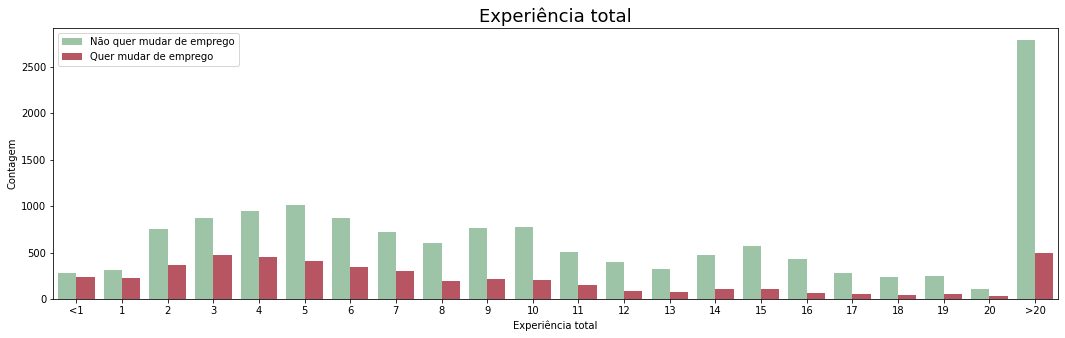

In [405]:
ordem = ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
 '19', '20', '>20']
 
plt.figure(figsize=(18,5))
sns.countplot(x = 'experience', hue="target", data = treino, order = ordem,
              palette={0: "#98caa3", 1: "#c84557"}) 
plt.xlabel("Experiência total")
plt.ylabel("Contagem")
plt.title("Experiência total", fontsize=18)
plt.legend(labels=['Não quer mudar de emprego', 'Quer mudar de emprego'])
plt.show()

Quanto mais experiente o candidato, menor parece ser a taxa de desejo de mudança de emprego

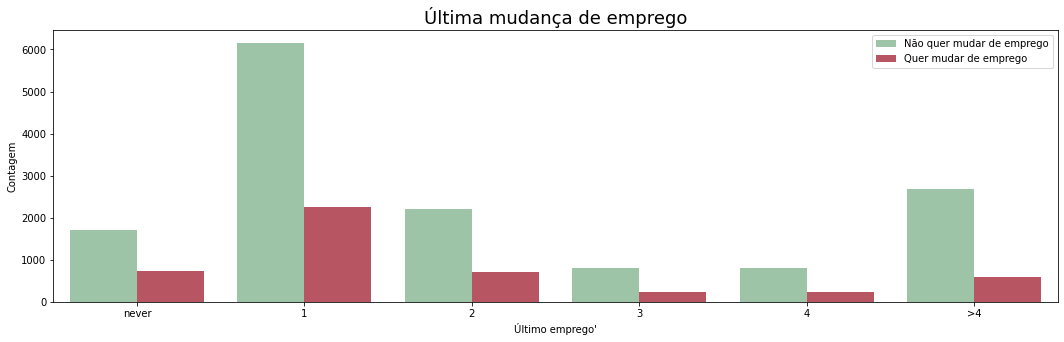

In [406]:
ordem = ["never", "1", "2", "3", "4", ">4"]
plt.figure(figsize=(18,5))
sns.countplot(x = 'last_new_job', hue="target", data = treino, order = ordem,
              palette={0: "#98caa3", 1: "#c84557"}) 
plt.xlabel("Último emprego'")
plt.ylabel("Contagem")
plt.title("Última mudança de emprego", fontsize=18)
plt.legend(labels=['Não quer mudar de emprego', 'Quer mudar de emprego'])
plt.show()

Essa categoria não parece possuir correlação forte com a coluna target, mas também não podemos descartá-la.

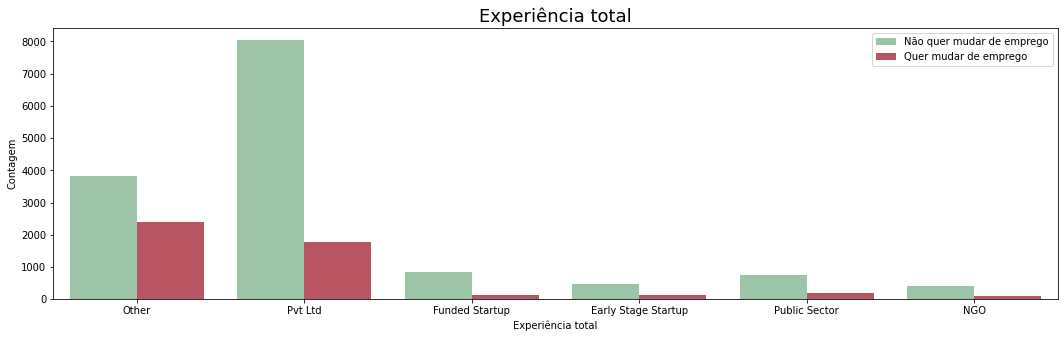

In [407]:
plt.figure(figsize=(18,5))
sns.countplot(x = 'company_type', hue="target", data = treino,
              palette={0: "#98caa3", 1: "#c84557"}) 
plt.xlabel("Experiência total")
plt.ylabel("Contagem")
plt.title("Experiência total", fontsize=18)
plt.legend(labels=['Não quer mudar de emprego', 'Quer mudar de emprego'])
plt.show()

Companhias do tipo "Pvt Ltd" possuem uma taxa menor de candidatos que desejam a mudança de emprego, enquanto na categoria "Other" essa taxa é bem maior.

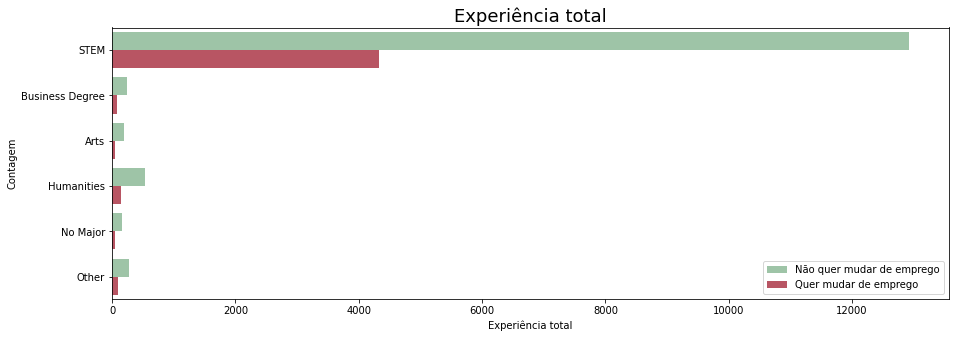

In [408]:
plt.figure(figsize=(15,5))
sns.countplot(y = 'major_discipline', hue="target", data = treino,
              palette={0: "#98caa3", 1: "#c84557"}) 
plt.xlabel("Experiência total")
plt.ylabel("Contagem")
plt.title("Experiência total", fontsize=18)
plt.legend(labels=['Não quer mudar de emprego', 'Quer mudar de emprego'])
plt.show()

Não parece haver correlação entre as duas.

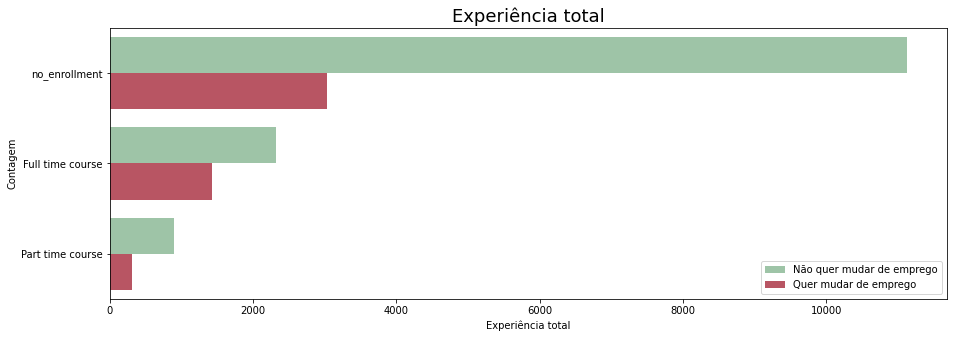

In [409]:
plt.figure(figsize=(15,5))
sns.countplot(y = 'enrolled_university', hue="target", data = treino,
              palette={0: "#98caa3", 1: "#c84557"}) 
plt.xlabel("Experiência total")
plt.ylabel("Contagem")
plt.title("Experiência total", fontsize=18)
plt.legend(labels=['Não quer mudar de emprego', 'Quer mudar de emprego'])
plt.show()

Pessoas que estão em curso integral na faculdade são as que parecem mais querer mudar de emprego.

#Modelo de Predição

In [410]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

Para a criação dos nossos modelos de predição, deixaremos apenas a coluna "training_hours" de lado.

In [411]:
# não quero alterar o dataset de teste, então vou salvá-lo primeiro
teste = candidatos[candidatos["target"].isnull()]

#criando dummies em nossos dados de treino para os nossos modelos de predição
candidatos.drop('training_hours', axis=1, inplace=True)
candidatos = pd.get_dummies(candidatos, drop_first=True)
treino = candidatos[candidatos["target"].isnull() == False]

In [412]:
# separando os dados que vamos utilizar em treino e teste novamente
X = treino.drop("target", axis=1).values
y = treino["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

##K Nearest Neighbors

Para o nosso K Nearest Neighbors, vamos testar diferentes valores de k e escolher aquele com média de cross_val_score mais alta

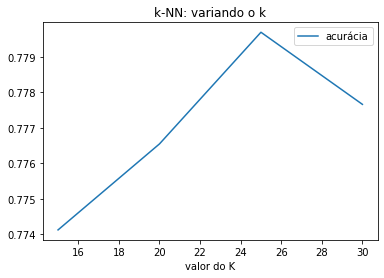

In [413]:
neighbors = range(15, 35, 5)
scores = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = np.mean(cross_val_score(knn, X_train, y_train, cv = 10))
    scores[i] = score

# Plotando
plt.title('k-NN: variando o k')
plt.plot(neighbors, scores, label = 'acurácia')
plt.legend()
plt.xlabel('valor do K')
plt.show()


Fica claro no gráfico que o melhor valor de k a ser escolhido é de 25

In [414]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(knn.score(X_test, y_test))

0.7876407436501702


Obtivemos uma acurácia de 0.788, um número razoável. Contudo, devemos sempre checar também as outras métricas:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


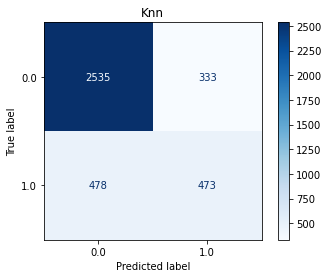

In [415]:
# Matriz de confusão
plot_confusion_matrix(knn, X_test, y_test, values_format='d', cmap = "Blues")
plt.title('Knn')
plt.show()

In [416]:
# Classification report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      2868
         1.0       0.59      0.50      0.54       951

    accuracy                           0.79      3819
   macro avg       0.71      0.69      0.70      3819
weighted avg       0.78      0.79      0.78      3819



##Logistic Regression

In [417]:
from sklearn.linear_model import LogisticRegression

In [418]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(logreg.score(X_test, y_test))

0.7818800733176224


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


A acurácia desse modelo foi pior do que a última, mas devemos ainda checar as outras métricas:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


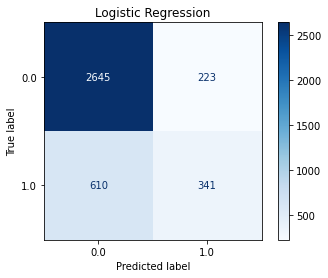

In [419]:
# Matriz de confusão
plot_confusion_matrix(logreg, X_test, y_test, values_format='d', cmap = "Blues")
plt.title('Logistic Regression')
plt.show()

Podemos parceber que apesar da acurácia semelhante com o modelo de knn, a regressão linear obteve mais falsos negativos e menos falsos positivos! Essa análise é crucial dependendo da predição que estamos fazendo. No caso que estamos estudando contudo, essa diferença não é tão relevante.

In [420]:
# Classification report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      2868
         1.0       0.60      0.36      0.45       951

    accuracy                           0.78      3819
   macro avg       0.71      0.64      0.66      3819
weighted avg       0.76      0.78      0.76      3819



##Random Forest Classifier

In [421]:
from sklearn.ensemble import RandomForestClassifier 

In [422]:
rf = RandomForestClassifier(
    max_depth=35,
    n_estimators=250,
    min_samples_split=50,
    criterion='entropy',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(rf.score(X_test, y_test))

0.7941869599371564


Essa foi a maior acurácia até o momento, mas devemos ainda assim olhar as outras métricas:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


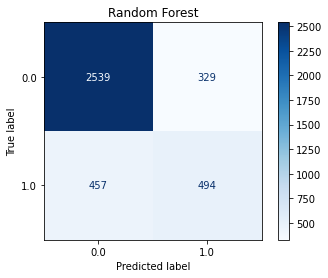

In [423]:
# Matriz de confusão
plot_confusion_matrix(rf, X_test, y_test, values_format='d', cmap = "Blues")
plt.title('Random Forest')
plt.show()

Tanto nos números de falsos positivos quanto no de falsos negativos, esse modelo superou todos os outros!

In [424]:
# Classification report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      2868
         1.0       0.60      0.52      0.56       951

    accuracy                           0.79      3819
   macro avg       0.72      0.70      0.71      3819
weighted avg       0.79      0.79      0.79      3819



#Conclusão

Os três modelos testados acima tiveram uma performance muito parecida e suas métricas foram equilibradas entre falsos-positivos e falsos-negativos. O modelo escolhido, entretanto, foi o Random Forest Classifier, que teve suas métricas minimamente melhores. 
A seguir iremos finalmente utilizar os dados de teste fornecidos, que não possuem a coluna "target", para prever se um determinado candidato deseja mudar seu emprego.

In [425]:
teste_final = candidatos[candidatos["target"].isnull()]
X_final = teste_final.drop("target", axis=1).values

teste["target"] = rf.predict(X_final)

In [426]:
teste.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19158,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Other,1,21,0.0
19159,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,98,0.0
19160,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,<1,50-99,Pvt Ltd,never,15,0.0
19161,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10-49,Pvt Ltd,1,39,0.0
19162,city_23,0.899,Male,No relevent experience,Part time course,Masters,STEM,10,50-99,Other,2,12,0.0
19163,city_21,0.624,Other,Has relevent experience,no_enrollment,Graduate,STEM,<1,100-500,Pvt Ltd,1,11,1.0
19164,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Other,>4,81,1.0
19165,city_173,0.878,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Other,4,2,0.0
19166,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,3,50-99,Funded Startup,1,4,1.0
19167,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,Other,>20,50-99,Other,>4,196,1.0


E assim esse projeto é finalizado, com a coluna "target" devidamente preenchida com os valores preditos! 

Podemos concluir que o modelo escolhido, apesar de funcionar, poderia melhorar em diversos quesitos. Para isso, seria necessário pre-processar os dados mais rigorosamente, normalizá-los e até mesmo retirar outras colunas antes de treinar o modelo. Por fim, existem maneiras de testar mais fortemente os hiperparâmetros para encontrar os seus valores ideais! 